# Reference: Python Data Science Handbook


 https://jakevdp.github.io/PythonDataScienceHandbook

* Machine learning
    * Algorithms which use statistics to automatically find patterns in data
* ML problems
    * **Supervised learning**: Labelled dataset
        * **Regression**: Predicting continuous values
        * **Classification**: Predicting categorical values
        * Examples: Linear regression, Nearest neighbor, Naive Bayes, SVM, Random forest, Decision trees
    * **Unsupervised learning**: Only input values are available
        * **Clustering**: Model finds different patterns
        * **Association**: Rule based ML technique which finds out relations between parameters of a large dataset
        * Examples: K-means clustering, DBSCAN – Density-Based Spatial Clustering of Applications with Noise, BIRCH – Balanced Iterative Reducing and Clustering using Hierarchies, Hierarchical Clustering
        * Training data
            * Unstructured data: noisy data, missing values or unknown data
            * Unlabeled data
    * **Semi-supervised**
        * Used when dealing with data which is partially labelled. Predict labels and feed them to supervised techniques
        * Applications: Speech analysis (labeling of audio files), internet content classification, Protein sequence classification
    * **Reinforcement learning**
        * Models keeps on increasing its performance using a reward feedback to learn a behavior or pattern
        * Examples: Temporal difference (TD), Q-learning, Deep adversarial networks
   



# General flow for using `sklearn` 

In [1]:
import pandas as pd
import numpy as np

## Data wrangling


In [2]:
df = pd.read_csv('data/loan.csv')
df.head()

,Unnamed: 0,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
0,6,15.31,670,36,4891.67,6000
1,11,19.72,670,36,3575.00,2000
2,12,14.27,665,36,4250.00,10625
3,13,21.67,670,60,14166.67,28000
4,21,21.98,665,36,6666.67,22000


In [3]:
df = df.drop('Unnamed: 0', 1)
df.head()

/var/folders/4q/synq9nts6dz2rwxkqkt0q8fc0000gn/T/ipykernel_52533/192332815.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
0,15.31,670,36,4891.67,6000
1,19.72,670,36,3575.00,2000
2,14.27,665,36,4250.00,10625
3,21.67,670,60,14166.67,28000
4,21.98,665,36,6666.67,22000


In [4]:
df.loc[:, 'Interest.Rate':'Loan.Length']

,Interest.Rate,FICO.Score,Loan.Length
0,15.31,670,36
1,19.72,670,36
2,14.27,665,36
3,21.67,670,60
4,21.98,665,36
...,...,...,...
2495,7.90,770,36
2496,6.03,760,36
2497,6.62,810,36
2498,10.75,765,36


In [5]:
df.shape

(2500, 5)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.isnull()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2495,False,False,False,False,False
2496,False,False,False,False,False
2497,False,False,False,False,False
2498,False,False,False,False,False


In [8]:
np.sum(df.isnull())

Interest.Rate     0
FICO.Score        0
Loan.Length       0
Monthly.Income    1
Loan.Amount       0
dtype: int64

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df = df.dropna(axis=0)

In [11]:
df_new = df.iloc[14:25, 2:4].copy()
print(df_new)

    Loan.Length  Monthly.Income
14           36         1100.00
15           36         3250.00
16           36         4583.33
17           36         3833.33
18           36         5000.00
19           36         2500.00
20           36         2000.00
21           36         2666.67
22           36         4166.67
23           36         5833.33
24           36         5000.00


In [12]:
np.sum(df.isnull())

Interest.Rate     0
FICO.Score        0
Loan.Length       0
Monthly.Income    0
Loan.Amount       0
dtype: int64

In [13]:
df.isnull().sum()

Interest.Rate     0
FICO.Score        0
Loan.Length       0
Monthly.Income    0
Loan.Amount       0
dtype: int64

In [14]:
features = df.iloc[:, 1:]
features.head()

,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
0,670,36,4891.67,6000
1,670,36,3575.00,2000
2,665,36,4250.00,10625
3,670,60,14166.67,28000
4,665,36,6666.67,22000


In [15]:
features.shape

(2499, 4)

In [16]:
labels = df.iloc[:, 0]
labels.head()

0    15.31
1    19.72
2    14.27
3    21.67
4    21.98
Name: Interest.Rate, dtype: float64

In [17]:
X = features.to_numpy()
y = labels.to_numpy()

In [18]:
print("Features: \n", X)
print("\n\nLabels: \n", y)

Features: 
 [[  670.      36.    4891.67  6000.  ]
 [  670.      36.    3575.    2000.  ]
 [  665.      36.    4250.   10625.  ]
 ...
 [  810.      36.    9250.   27000.  ]
 [  765.      36.    7083.33 25000.  ]
 [  740.      60.    8903.25 16000.  ]]


Labels: 
 [15.31 19.72 14.27 ...  6.62 10.75 14.09]


In [19]:
print(X.shape)
print(y.shape)

(2499, 4)
(2499,)


## Estimator class/object


In [20]:
class Estimator(object):
  
    def fit(self, X, y=None):
        """Train model using X and y"""
        self.attributes = self.some_fitting_method(X, y)
        return self
            
    def predict(self, X_test):
        """Make predictions using features array"""
        pred = self.make_prediction(X_test)
        return pred
    
model = Estimator()

## Linear Regression

In [22]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 13.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 7.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [25]:
print("The training split: \n")
print(len(X_train), len(y_train))
print("\n\nThe testing split: \n")
print(len(X_test), len(y_test))

The training split: 

1874 1874


The testing split: 

625 625


In [26]:
# estimator instance (object)
clf = LinearRegression()

# train the estimator 
clf.fit(X_train, y_train)

LinearRegression()

In [27]:
predictions = clf.predict(X_test)
print(len(predictions))

625


In [28]:
predictions[:10]

array([ 6.90826265, 13.52648136, 15.57930877, 13.85943541, 12.30649559,
       12.01958901, 15.27946054, 15.16099479,  5.21633068, 16.87809819])

In [29]:
# regression model coefficients
print('Regression Coefficients: \n', clf.coef_)
# mean square error
print("\n\nResidual sum of squares: {:2.2f}".format(np.mean((predictions - y_test) ** 2)))

# explained variance score: 1 is perfect prediction
print('\n\nVariance score: {:2.2f}'.format(clf.score(X_test, y_test)))

Regression Coefficients: 
 [-8.77809768e-02  1.36242413e-01 -3.35528901e-05  1.49146117e-04]


Residual sum of squares: 4.51


Variance score: 0.72


# KNN

**Algorithm**

Given a new item:

1. Find distances between new item and all other items

2. Pick k shorter distances

3. Pick the most common class in these k distances

4. That class is where we will classify the new ite

It does not need to be trained. The training phase merely stores the training data.

Euclidean distance is used to find nearest neighbours generally, but other distance metrics can also be used.

As the dimensionality of the feature space increases, the euclidean distance often becomes problematic due to the curse of dimensionality.

Alternative vector-based similarity measures (dot product, cosine similarity, etc) can be used to transforms the original metric space into a more suitable one for point-to-point measurements.

In [30]:
# Data in a csv format, each observation has a 4 measurements/features 
# and the species type.
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=400, height=200)

In [31]:
# Import the load_iris function from datsets module
from sklearn.datasets import load_iris

In [32]:
# Create bunch object containing iris dataset and its attributes.
iris = load_iris()

In [33]:
type(iris)

sklearn.utils._bunch.Bunch

In [34]:
# Print the iris data
print(iris.data.shape)

(150, 4)


In [35]:
type(iris.data)

numpy.ndarray

In [36]:
iris.data[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [37]:
# Names of 4 features (column names)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
# Integers representing the species: 0 = setosa, 1=versicolor, 2=virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [39]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [40]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
# we have a total of 150 observations and 4 features
print(iris.data.shape)

(150, 4)


In [42]:
# Feature matrix in a object named X
X = iris.data
# response vector in a object named y
y = iris.target

In [43]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [45]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier


In [47]:
from sklearn import metrics

In [48]:
k_range = range(1, 5)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [49]:
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

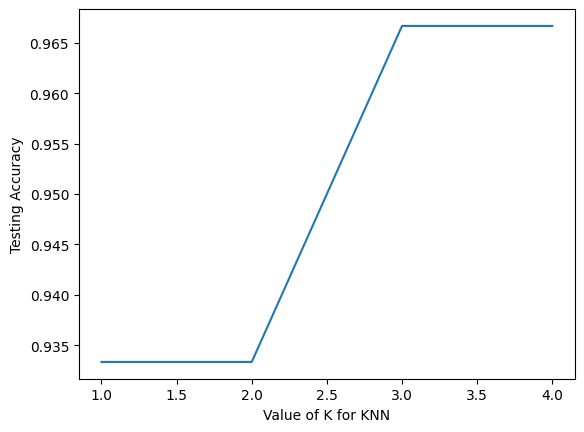

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [52]:
classes = {0:'setosa',1:'versicolor',2:'virginica'}

x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


# Feature Engineering


One of the more important steps in using machine learning in practice is *feature engineering*: that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

## Categorical Features

One common type of non-numerical data is *categorical* data.
For example, imagine you are exploring some data on housing prices, and along with numerical features like "price" and "rooms", you also have "neighborhood" information.
For example, your data might look something like this:

In [53]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

*You* might be tempted to encode this data with a straightforward numerical mapping:

In [54]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

It turns out that this is not generally a useful approach in Scikit-Learn: the package's models make the fundamental assumption that numerical features reflect algebraic quantities.
Thus such a mapping would imply, for example, that *Queen Anne < Fremont < Wallingford*, or even that *Wallingford - Queen Anne = Fremont*, which (niche demographic jokes aside) does not make much sense.

In this case, one proven technique is to use *one-hot encoding*, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively.
When your data comes as a list of dictionaries, Scikit-Learn's ``DictVectorizer`` will do this for you:

In [55]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

Notice that the 'neighborhood' column has been expanded into three separate columns, representing the three neighborhood labels, and that each row has a 1 in the column associated with its neighborhood.
With these categorical features thus encoded, you can proceed as normal with fitting a Scikit-Learn model.

To see the meaning of each column, you can inspect the feature names:

In [57]:
#vec.get_feature_names()
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

There is one clear disadvantage of this approach: if your category has many possible values, this can *greatly* increase the size of your dataset.
However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [58]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs when fitting and evaluating models. ``sklearn.preprocessing.OneHotEncoder`` and ``sklearn.feature_extraction.FeatureHasher`` are two additional tools that Scikit-Learn includes to support this type of encoding.

## Text Features

Another common need in feature engineering is to convert text to a set of representative numerical values.
For example, most automatic mining of social media data relies on some form of encoding the text as numbers.
One of the simplest methods of encoding data is by *word counts*: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

For example, consider the following set of three phrases:

In [59]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

For a vectorization of this data based on word count, we could construct a column representing the word "problem," the word "evil," the word "horizon," and so on. While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's CountVectorizer:

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a DataFrame with labeled columns:

In [62]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms.
One approach to fix this is known as *term frequency-inverse document frequency* (*TF–IDF*) which weights the word counts by a measure of how often they appear in the documents.
The syntax for computing these features is similar to the previous example:

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Image Features

Another common need is to suitably encode *images* for machine learning analysis.
The simplest approach is what we used for the digits data in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb): simply using the pixel values themselves.
But depending on the application, such approaches may not be optimal.

A comprehensive summary of feature extraction techniques for images is well beyond the scope of this section, but you can find excellent implementations of many of the standard approaches in the [Scikit-Image project](http://scikit-image.org).
For one example of using Scikit-Learn and Scikit-Image together, see [Feature Engineering: Working with Images](05.14-Image-Features.ipynb).

# Handling Missing Data

## Trade-Offs in Missing Data Conventions

There are a number of schemes that have been developed to indicate the presence of missing data in a table or DataFrame.
Generally, they revolve around one of two strategies: using a *mask* that globally indicates missing values, or choosing a *sentinel value* that indicates a missing entry.

In the masking approach, the mask might be an entirely separate Boolean array, or it may involve appropriation of one bit in the data representation to locally indicate the null status of a value.

In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with -9999 or some rare bit pattern, or it could be a more global convention, such as indicating a missing floating-point value with NaN (Not a Number), a special value which is part of the IEEE floating-point specification.

None of these approaches is without trade-offs: use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra (often non-optimized) logic in CPU and GPU arithmetic. Common special values like NaN are not available for all data types.

As in most cases where no universally optimal choice exists, different languages and systems use different conventions.
For example, the R language uses reserved bit patterns within each data type as sentinel values indicating missing data, while the SciDB system uses an extra byte attached to every cell which indicates a NA state.

## Missing Data in Pandas

NumPy does have support for masked arrays – that is, arrays that have a separate Boolean mask array attached for marking data as "good" or "bad."
Pandas could have derived from this, but the overhead in both storage, computation, and code maintenance makes that an unattractive choice.

With these constraints in mind, Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point ``NaN`` value, and the Python ``None`` object.
This choice has some side effects, as we will see, but in practice ends up being a good compromise in most cases of interest.

### ``None``: Pythonic missing data

The first sentinel value used by Pandas is ``None``, a Python singleton object that is often used for missing data in Python code.
Because it is a Python object, ``None`` cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type ``'object'`` (i.e., arrays of Python objects):

In [65]:
import numpy as np
import pandas as pd

In [66]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

This ``dtype=object`` means that the best common type representation NumPy could infer for the contents of the array is that they are Python objects.
While this kind of object array is useful for some purposes, any operations on the data will be done at the Python level, with much more overhead than the typically fast operations seen for arrays with native types:

In [67]:
for dtype in ['object', 'int', 'int32']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
68.1 ms ± 454 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
703 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

dtype = int32
1.06 ms ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



The use of Python objects in an array also means that if you perform aggregations like ``sum()`` or ``min()`` across an array with a ``None`` value, you will generally get an error:


In [68]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

This reflects the fact that addition between an integer and ``None`` is undefined.

### ``NaN``: Missing numerical data

The other missing data representation, ``NaN`` (acronym for *Not a Number*), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

Notice that NumPy chose a native floating-point type for this array: this means that unlike the object array from before, this array supports fast operations pushed into compiled code. You should be aware that NaN is a bit like a data virus–it infects any other object it touches. Regardless of the operation, the result of arithmetic with NaN will be another NaN:

In [69]:
1 + np.nan

nan

In [70]:
0 *  np.nan

nan

In [ ]:
v

In [71]:
vals2.sum(), vals2.min(), vals2.max()

NameError: name 'vals2' is not defined

In [277]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

Keep in mind that ``NaN`` is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.


### NaN and None in Pandas

``NaN`` and ``None`` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [279]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

For types that don't have an available sentinel value, Pandas automatically type-casts when NA values are present.
For example, if we set a value in an integer array to ``np.nan``, it will automatically be upcast to a floating-point type to accommodate the NA:

In [281]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [282]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Notice that in addition to casting the integer array to floating point, Pandas automatically converts the ``None`` to a ``NaN`` value.
(Be aware that there is a proposal to add a native integer NA to Pandas in the future; as of this writing, it has not been included).

The following table lists the upcasting conventions in Pandas when NA values are introduced:

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Keep in mind that in Pandas, string data is always stored with an ``object`` dtype.

## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

### Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [99]:
data = pd.Series([1, np.nan, 'hello', None])

In [100]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [101]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [286]:
data[data.notnull()]

0        1
2    hello
dtype: object

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

### Dropping null values

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [287]:
data.dropna()

0        1
2    hello
dtype: object

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [289]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [290]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [292]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [293]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [294]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [295]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Here the first and last row have been dropped, because they contain only two non-null values.

### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.

Consider the following ``Series``:

In [297]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

We can fill NA entries with a single value, such as zero:

In [299]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

We can specify a forward-fill to propagate the previous value forward:

In [300]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

Or we can specify a back-fill to propagate the next values backward:

In [301]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [302]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [303]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Notice that if a previous value is not available during a forward fill, the NA value remains.
